In [1]:
# SETTINGS

number_topics = 15

# Filter

Here we assume that the source file already contains the text, as it's a subcorpus.

In [2]:
# Filter the input file
import pandas as pd

df = pd.read_csv('00 source data (urls).csv')
df.fillna('', inplace=True)

# /!\ FILTERING
df = df[df['language'] == 'Greenlandic']

df.to_csv("01 data filtered.csv", index = False, encoding='utf-8')

df

,result #,search engine,query,discourse,language,domain,Manual actor name,article title,article url,article description,...,canonical_url,title,description,raw_content,comments,author,categories,tags,date,sitename
296,113.0,bing,“CO2-mik aniatitsineq” OR “Kiatsitsikkiartorne...,,Greenlandic,facebook,Urani Naamik,Urani Naamik - Posts | Facebook,https://www.facebook.com/uraninaamik2/posts,Urani Naamik. 546 likes · 6 talking about this...,...,https://www.facebook.com/pages/category/Enviro...,Urani Naamik,Urani Naamik. 567 Synes godt om. Uran Naamik,Ugguuna toqqanartumik narsami ataatsimiineq is...,,,,,2021-01-06,Opslag | Facebook
347,9.0,,Arctic Consensus' Liste - Grønland,,Greenlandic,ini,Ini,,https://ini.gl/da/Om-INI-A-slash-S/Samfundsans...,,...,,,,,,,,,,
354,2.0,,Arctic Consensus' Liste - Grønland,,Greenlandic,airgreenland,Air Greenland,,https://www.airgreenland.com/media/1538588/ag_...,,...,,,,,,,,,,
358,3.0,,Arctic Consensus' Liste - Grønland,,Greenlandic,banken,GrønlandsBANKEN,,https://www.banken.gl/en/investor/social-respo...,,...,,\r\n Cookies\r\n,,This website uses cookies to ensure that you g...,,,,,,Environment
361,16.0,,Arctic Consensus' Liste - Grønland,,Greenlandic,sikuki,Sikuki Nuuk Harbour,,https://www.sikuki.dk/company-information/csr/,,...,,\nCSR,,CSR\nSikuki Nuuk Harbour A/S (from here: Sikuk...,,,,,,
363,,Royal Arctic Line,Arctic Consensus' Liste - Grønland,,Greenlandic,ral,RAL,,https://www.ral.dk/om-os/samfundsansvar/,,...,,Royal Arctic Lines arbejde med samfundsansvar,,Royal Arctic Lines arbejde med samfundsansvar\...,,,,,,Royal Arctic Line
364,7.0,,Arctic Consensus' Liste - Grønland,,Greenlandic,telepost,Tele-Post,,https://telepost.gl/da/om-tele-post/baggrund/o...,,...,https://telepost.gl/da/om-tele-post/baggrund/o...,TELE-POSTs politik for samfundsansvar,1. Politikkens formålTELE-POST ansatte har et ...,1. Politikkens formål\nTELE-POST ansatte har e...,,,,,,TELEPOST
367,,KNI,Arctic Consensus' Liste - Grønland,,Greenlandic,kni,KNI,,https://kni.gl/en/kni/kni-i-dag/,,...,http://www.kni.gl/kl/,KNI A/S,"We supply all of Greenland with groceries, con...",KNI A/S\n- A modern and well-consolidated comp...,,,,,,KNI A/S
369,4.0,,Arctic Consensus' Liste - Grønland,,Greenlandic,permagreen,Permagreen,,http://www.permagreen.gl/om-permagreen/,,...,http://www.permagreen.gl/om-permagreen/,Om Permagreen,,Trekanten kan desuden ses som en tagprofil – e...,,,,,,Permagreen Grønland
374,1.0,,Arctic Consensus' Liste - Grønland,,Greenlandic,royalgreenland,Royal Greenland,,https://www.royalgreenland.com/sustainability/,,...,https://www.royalgreenland.com/sustainability/,Sustainability,,Royal Greenland’s sustainability programme is ...,,,,,,Royal Greenland A/S


# Group content by actor

In [3]:
actor_dict = {}
for index, row in df.iterrows():
    if row['Manual actor name']:
        actor_id = row['Manual actor name']
    else:
        actor_id = row['domain']
    if actor_id in actor_dict:
        actor_obj = actor_dict[actor_id]
    else:
        actor_obj = {}
        actor_obj['Id'] = actor_id
        actor_obj['urls'] = ''
        actor_obj['text'] = ''
        actor_obj['language'] = row['language']
    
    actor_obj['urls'] = actor_obj['urls'] + str(row['article url']) + ' '
    actor_obj['text'] = actor_obj['text'] + str(row['raw_content']) + ' . '
    
    actor_dict[actor_id] = actor_obj
print("Actor index built.")

Actor index built.


In [4]:
# DOWNLOAD ACTORS
actors_df = pd.DataFrame.from_dict(actor_dict, orient='index')
actors_df.to_csv("02 Actors with text.csv", index = False, encoding='utf-8')
actors_df

,Id,urls,text,language
Urani Naamik,Urani Naamik,https://www.facebook.com/uraninaamik2/posts,Ugguuna toqqanartumik narsami ataatsimiineq is...,Greenlandic
Ini,Ini,https://ini.gl/da/Om-INI-A-slash-S/Samfundsans...,.,Greenlandic
Air Greenland,Air Greenland,https://www.airgreenland.com/media/1538588/ag_...,.,Greenlandic
GrønlandsBANKEN,GrønlandsBANKEN,https://www.banken.gl/en/investor/social-respo...,This website uses cookies to ensure that you g...,Greenlandic
Sikuki Nuuk Harbour,Sikuki Nuuk Harbour,https://www.sikuki.dk/company-information/csr/,CSR\nSikuki Nuuk Harbour A/S (from here: Sikuk...,Greenlandic
RAL,RAL,https://www.ral.dk/om-os/samfundsansvar/,Royal Arctic Lines arbejde med samfundsansvar\...,Greenlandic
Tele-Post,Tele-Post,https://telepost.gl/da/om-tele-post/baggrund/o...,1. Politikkens formål\nTELE-POST ansatte har e...,Greenlandic
KNI,KNI,https://kni.gl/en/kni/kni-i-dag/,KNI A/S\n- A modern and well-consolidated comp...,Greenlandic
Permagreen,Permagreen,http://www.permagreen.gl/om-permagreen/ http:/...,Trekanten kan desuden ses som en tagprofil – e...,Greenlandic
Royal Greenland,Royal Greenland,https://www.royalgreenland.com/sustainability/,Royal Greenland’s sustainability programme is ...,Greenlandic


# LDA: extract topics

In [5]:
import pandas as pd
# This is for text mining
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [6]:
# Source file (CSV)
source_file = "02 Actors with text.csv"
text_col_name = "text"

# More features is more dimensions for each document. You should probably keep it at 1000.
no_features = 1000

In [7]:
# LOAD DATA
documents_dictionary = {}
df = pd.read_csv(source_file)

for index, row in df.iterrows():
    key = row['Id']
    text = str(row[text_col_name])
    if len(text)>10:
        documents_dictionary[key] = text

In [8]:
# LOAD STOP WORDS
import csv
stopwords = []
with open('stopwords-en-dk-is.txt', 'r') as fd:
    reader = csv.reader(fd)
    for row in reader:
        word = row[0]
        stopwords.append(word)
print("Stop words loaded. Ex:", stopwords[0], stopwords[1], stopwords[2],"...")

Stop words loaded. Ex: i me my ...


In [9]:
# COMPUTE LDA TOPICS
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words=stopwords)
tf = tf_vectorizer.fit_transform(documents_dictionary.values())
tf_feature_names = tf_vectorizer.get_feature_names()
lda = LatentDirichletAllocation(n_components=number_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
print("LDA topics computed.")

LDA topics computed.


In [10]:
# DISPLAY RESULTS (for monitoring)
no_top_words = 25 # How many words to keep for each topic (there may be many)

# Create a data frame for convenience (for download, actually)
topics_df = pd.DataFrame(columns=['topic','word','weight'])

# Display topics to check it works. For each topic, we only display the top words.
i = 0
for topic_idx, topic in enumerate(lda.components_):
    print("# TOPIC_%d:" % (topic_idx))
    for j in topic.argsort()[:-no_top_words - 1:-1]:
        print(str(topic[j]) + "   " + tf_feature_names[j])
        topics_df.loc[i] = ["TOPIC_"+str(topic_idx), tf_feature_names[j], topic[j]]
        i = i+1
    print(" ")

topics_df

# TOPIC_0:
1.1966403034587   00
1.0049961985387008   råvarer
0.9858839520419072   dansk
0.9602644529659039   grønlandske
0.955000726898015   isumaqarpoq
0.951769128046464   2005
0.9461523916853743   indenfor
0.937973265503285   pillugit
0.9374231726232507   guide
0.9353114328215831   nuuk
0.9281063243204798   områder
0.9268777072125284   besøger
0.924639215693334   suliffeqarfitsinni
0.9220082384242209   serveret
0.9216356167080226   export
0.9170306952279013   arbejdet
0.9168916559607702   03
0.9156487869603119   greenland
0.9098667826717385   compact
0.9095885122456571   befolkning
0.9091213430042956   kangerlussuaq
0.9074229573810294   sanaartornerni
0.9066273125224599   samt
0.9063581687665336   sisimiut
0.9016676440354846   europa
 
# TOPIC_1:
2.1702995523376996   post
1.9869816798209876   tele
1.9126600433417924   politikken
1.7533405571937355   udvikling
1.699220369705244   grønland
1.6827634665932425   forretning
1.62241560386608   evt
1.5446339629845758   ansvarlig
1.515712249

4.4355806044843895   also
3.3984896059917586   people
2.7479873257171965   world
2.739451039650076   focus
2.7245325182902107   company
2.7182774878541567   nuuk
2.698272026094269   experience
2.661307065782867   csr
2.4913436308269237   local
2.4405258065130506   east
2.4226044229630137   international
2.390599795044272   opportunities
2.3896336811973717   years
2.3142014691811803   greenlandic
2.1614864272623477   member
2.1575115069861113   responsible
2.1570951655284065   first
2.12491103243043   day
2.110124008143324   denmark
2.0921333992790885   environmental
2.079387290803256   area
 
# TOPIC_13:
1.1558835315300628   work
0.9908476853360988   therefore
0.9908054506362158   partners
0.9892524382632977   company
0.9879102296066795   csr
0.9840930319485078   indebærer
0.9674306974038074   employees
0.9581872041506023   education
0.9483522453656347   four
0.9413991626620232   moskusokser
0.9321238748832756   side
0.9265910585286918   mad
0.9263518881809367   sustainability
0.926067

,topic,word,weight
0,TOPIC_0,00,1.196640
1,TOPIC_0,råvarer,1.004996
2,TOPIC_0,dansk,0.985884
3,TOPIC_0,grønlandske,0.960264
4,TOPIC_0,isumaqarpoq,0.955001
...,...,...,...
370,TOPIC_14,industry,0.967843
371,TOPIC_14,become,0.955274
372,TOPIC_14,reflected,0.940667
373,TOPIC_14,restaurant,0.940267


In [11]:
# COMPUTE DOC x TOPIC RELATIONS (network)
# We create a data frame to store the content. It looks like a matrix.
df_matrix_style = pd.DataFrame(columns=['doc']+[("TOPIC_"+str(i)) for i in range(0,number_topics)])

# We create a second data frame with the same data. It looks like a list.
# Depending on what you want to do, one or the other are most convenient.
df_list_style = pd.DataFrame(columns=['doc', 'topic', 'weight'])

doc_topic = lda.transform(tf)
docs = list(documents_dictionary.keys())
topic_index = {}
i1 = 0
i2 = 0
for j in range(len(docs)):
    key = docs[j]
    topic_weights = list(doc_topic[j])
    
    # Index
    topic_index[key] = topic_weights
    
    # Matrix style
    df_matrix_style.loc[i1] = [key]+topic_weights
    i1 = i1+1
    
    # List style
    for k, w in enumerate(topic_weights):
        df_list_style.loc[i2] = [key, "TOPIC_"+str(k), w]
        i2 = i2+1

print("Done.")

Done.


In [12]:
# Output articles & topics, matrix style, to check that it works:
df_matrix_style

,doc,TOPIC_0,TOPIC_1,TOPIC_2,TOPIC_3,TOPIC_4,TOPIC_5,TOPIC_6,TOPIC_7,TOPIC_8,TOPIC_9,TOPIC_10,TOPIC_11,TOPIC_12,TOPIC_13,TOPIC_14
0,Urani Naamik,0.001170,0.001170,0.001170,0.001170,0.001170,0.001170,0.001170,0.001170,0.001170,0.001170,0.983626,0.001170,0.001170,0.001170,0.001170
1,GrønlandsBANKEN,0.004167,0.004167,0.941667,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167
2,Sikuki Nuuk Harbour,0.000501,0.000501,0.000501,0.000501,0.000501,0.000501,0.000501,0.000501,0.000501,0.000501,0.000501,0.000501,0.992982,0.000501,0.000501
3,RAL,0.002222,0.002222,0.002222,0.002222,0.002222,0.968889,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222
4,Tele-Post,0.000494,0.993086,0.000494,0.000494,0.000494,0.000494,0.000494,0.000494,0.000494,0.000494,0.000494,0.000494,0.000494,0.000494,0.000494
5,KNI,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.970833,0.002083,0.002083
6,Permagreen,0.000057,0.000057,0.000057,0.999198,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057
7,Royal Greenland,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.928205,0.005128,0.005128
8,Visit Greenland,0.000901,0.000901,0.000901,0.000901,0.000901,0.000901,0.000901,0.000901,0.000901,0.000901,0.000901,0.000901,0.987387,0.000901,0.000901
9,Greenland Ruby,0.000385,0.000385,0.000385,0.000385,0.000385,0.000385,0.000385,0.000385,0.000385,0.000385,0.000385,0.000385,0.994605,0.000385,0.000385


In [13]:
# Output articles & topics, list style, to check that it works:
df_list_style

,doc,topic,weight
0,Urani Naamik,TOPIC_0,0.001170
1,Urani Naamik,TOPIC_1,0.001170
2,Urani Naamik,TOPIC_2,0.001170
3,Urani Naamik,TOPIC_3,0.001170
4,Urani Naamik,TOPIC_4,0.001170
...,...,...,...
400,Inunnguaq Hegelund: kok: lokal mad,TOPIC_10,0.000272
401,Inunnguaq Hegelund: kok: lokal mad,TOPIC_11,0.000272
402,Inunnguaq Hegelund: kok: lokal mad,TOPIC_12,0.000272
403,Inunnguaq Hegelund: kok: lokal mad,TOPIC_13,0.000272


In [14]:
# DOWNLOAD LDA results
# Note: these files can be used in Tableau or Table2Net to build various visualizations.

topics_df.to_csv("03-a LDA topics and their words.csv", index = False, encoding='utf-8')
# df_matrix_style.to_csv("03-? LDA actors and topics matrix.csv", index = False, encoding='utf-8')
df_list_style.to_csv("03-b LDA actors and topics list style.csv", index = False, encoding='utf-8')

In [15]:
# ENRICH FILE (and monitor new version)
for topic_id, topic in enumerate(lda.components_):
    colname = "topic_"+str(topic_id)
    values = []
    for index, row in df.iterrows():
        key = row['Id']
        if key in topic_index:
            val = topic_index[key][topic_id]
        else:
            val = 0
        values.append(val)
    df.insert(len(df.columns), colname, values)
df

,Id,urls,text,language,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
0,Urani Naamik,https://www.facebook.com/uraninaamik2/posts,Ugguuna toqqanartumik narsami ataatsimiineq is...,Greenlandic,0.001170,0.001170,0.001170,0.001170,0.001170,0.001170,0.001170,0.001170,0.001170,0.001170,0.983626,0.001170,0.001170,0.001170,0.001170
1,Ini,https://ini.gl/da/Om-INI-A-slash-S/Samfundsans...,.,Greenlandic,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Air Greenland,https://www.airgreenland.com/media/1538588/ag_...,.,Greenlandic,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,GrønlandsBANKEN,https://www.banken.gl/en/investor/social-respo...,This website uses cookies to ensure that you g...,Greenlandic,0.004167,0.004167,0.941667,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167
4,Sikuki Nuuk Harbour,https://www.sikuki.dk/company-information/csr/,CSR\nSikuki Nuuk Harbour A/S (from here: Sikuk...,Greenlandic,0.000501,0.000501,0.000501,0.000501,0.000501,0.000501,0.000501,0.000501,0.000501,0.000501,0.000501,0.000501,0.992982,0.000501,0.000501
5,RAL,https://www.ral.dk/om-os/samfundsansvar/,Royal Arctic Lines arbejde med samfundsansvar\...,Greenlandic,0.002222,0.002222,0.002222,0.002222,0.002222,0.968889,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222
6,Tele-Post,https://telepost.gl/da/om-tele-post/baggrund/o...,1. Politikkens formål\nTELE-POST ansatte har e...,Greenlandic,0.000494,0.993086,0.000494,0.000494,0.000494,0.000494,0.000494,0.000494,0.000494,0.000494,0.000494,0.000494,0.000494,0.000494,0.000494
7,KNI,https://kni.gl/en/kni/kni-i-dag/,KNI A/S\n- A modern and well-consolidated comp...,Greenlandic,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.970833,0.002083,0.002083
8,Permagreen,http://www.permagreen.gl/om-permagreen/ http:/...,Trekanten kan desuden ses som en tagprofil – e...,Greenlandic,0.000057,0.000057,0.000057,0.999198,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057
9,Royal Greenland,https://www.royalgreenland.com/sustainability/,Royal Greenland’s sustainability programme is ...,Greenlandic,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.928205,0.005128,0.005128


In [16]:
# DOWNLOAD ENRICHED FILE
df.drop(columns=[text_col_name]).to_csv("04 Actors and their topics.csv", index=False)

# Export LDA networks

In [17]:
# Export network of words and topics
import networkx as nx
G = nx.Graph()
for index, row in topics_df.iterrows():
    topic = 'T_'+str(row['topic'])
    word = 'W_'+str(row['word'])
    w = row['weight']
    
    G.add_edge(topic, word)
    G[topic][word]['weight'] = w
    
    G.nodes[topic]['label'] = str(row['topic'])
    G.nodes[topic]['type'] = 'topic'
    G.nodes[word]['label'] = str(row['word'])
    G.nodes[word]['type'] = 'word'
    
nx.write_gexf(G, "05 Words and topics.gexf")

In [18]:
# Export network of actors and topics
import networkx as nx
threshold = 0.001
G = nx.Graph()
for index, row in df_list_style.iterrows():
    topic = 'T_'+str(row['topic'])
    actor = 'A_'+str(row['doc'])
    w = row['weight']
    
    if w > threshold:
        G.add_edge(topic, actor)
        G[topic][actor]['weight'] = w

        G.nodes[topic]['label'] = str(row['topic'])
        G.nodes[topic]['type'] = 'topic'
        G.nodes[actor]['label'] = str(row['doc'])
        G.nodes[actor]['type'] = 'actor'
    
nx.write_gexf(G, "06 Actors and topics.gexf")

# UMAP after the topics

In [19]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import umap

In [20]:
# Load data
df = pd.read_csv("04 Actors and their topics.csv")
df = df.dropna()

In [21]:
# Prepare data
reducer = umap.UMAP()
umap_data = df[
    [
        "topic_0",
        "topic_1",
        "topic_2",
        "topic_3",
        "topic_4",
        "topic_5",
        "topic_6",
        "topic_7",
        "topic_8",
        "topic_9",
        "topic_10",
        "topic_11",
        "topic_12",
        "topic_13",
        "topic_14"
    ]
].values
scaled_umap_data = StandardScaler().fit_transform(umap_data)

In [22]:
# Compute embedding
embedding = reducer.fit_transform(scaled_umap_data)
embedding.shape

(31, 2)

Text(0.5, 1.0, 'UMAP projection of the dataset')

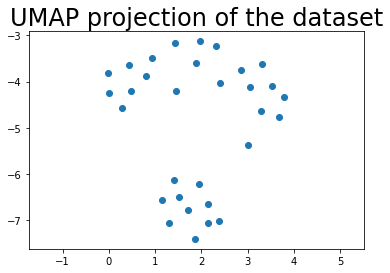

In [23]:
# Monitor embedding
plt.scatter(
    embedding[:, 0],
    embedding[:, 1]
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24)

In [24]:
# Enrich source and download
xvalues = []
yvalues = []
for index, row in df.iterrows():
    coord = embedding[index]
    xvalues.append(coord[0])
    yvalues.append(coord[1])
df.insert(len(df.columns), 'X-UMAP', xvalues)
df.insert(len(df.columns), 'Y-UMAP', yvalues)

df.to_csv("07 Actors with topics + UMAP layout.csv", index = False, encoding='utf-8')